> ### <font color='purple'> Import des bibliothèques</font>

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import imblearn
from imblearn.over_sampling import SMOTE
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold,cross_val_score
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model import ElasticNet, SGDClassifier
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.svm import SVC
from imblearn.metrics import classification_report_imbalanced
import pickle

In [70]:
df = pd.read_csv('BDD_nettoyé.csv')
df.head()

,Unnamed: 0,ID_Part_anonymisé,AGE_ANC_PART,departement.1,Age,Attrition,SITU_FAM_AVAN,CD_SEX,NB_CONTRAT_BAQ,NB_CONTRAT_Ass,...,job_PERS.SER,"job_PROF,PRO",job_PROF.ADM,job_PROF.INF,job_PROFESSI,job_SS ACT.-,flux_max,flux_min,flux_mean,flux_med
0,0,9901.0,25.0,1.0,24.340426,1.0,1.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21295.66,912.1,5070.973333,1471.435
1,1,9902.0,25.0,1.0,24.340426,1.0,1.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2800.00,0.0,666.666667,125.000
2,2,9903.0,24.0,1.0,23.568977,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,70.00,10.0,20.000000,10.000
3,3,9904.0,25.0,1.0,24.543583,0.0,1.0,1.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7110.00,30.0,1210.000000,30.000
4,4,9905.0,25.0,1.0,24.543583,0.0,1.0,1.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1500.00,0.0,250.000000,0.000


In [71]:
df = df.drop("Unnamed: 0", axis = 1)

In [72]:
#Supprimer les variables Id_part et la traget
ID = df['ID_Part_anonymisé']
X = df.drop(['Attrition','ID_Part_anonymisé'], axis = 1)
y = df['Attrition']

> ### <font color ='purple'> Standardiser les valeurs </font>

In [74]:
scaler = preprocessing.StandardScaler()
names = X.columns
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [75]:
# Créer train et test
X_train,X_test,y_train,y_test = train_test_split(scaled_df,y, test_size = 0.3,random_state=42)

In [76]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((26571, 100), (26571,)), ((11388, 100), (11388,)))

> ### <font color='purple'> Random Forest </font>

In [77]:
clf = RandomForestClassifier(random_state=42)

In [11]:
params =  {'n_estimators': [50,100,250,500],
           'max_features': ['auto', 'sqrt', 'log2'],
           'max_depth' : [4,5,6,7,8],
           'criterion' :['gini', 'entropy'],
           'min_samples_split': [2, 4, 6]}

gridsearch_cv=GridSearchCV(clf,
                   param_grid = params,
                   verbose = 1,
                   n_jobs=-1)
gridsearch_cv.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 39.2min finished


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 250, 500]},
             verbose=1)

#### <font color='Chocolate'> Meilleur parametres </font>

In [12]:
gridsearch_cv.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 50}

#### <font color='Chocolate'> Meilleur estimateur </font>

In [78]:
model_RF =RandomForestClassifier(criterion= 'gini',max_depth= 8,max_features='auto',
 min_samples_split= 4,n_estimators= 50)

In [13]:
model_RF = gridsearch_cv.best_estimator_

#### <font color='Chocolate'> Entrainer le modèle </font>

In [79]:
model_RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=4, n_estimators=50)

#### <font color='Chocolate'> Prédictions </font>

In [80]:
pred_RF = model_RF.predict(X_test)

#### <font color='Chocolate'>Evaluation </font>

In [81]:
report = classification_report(y_test, pred_RF)
report1 = classification_report_imbalanced(y_test, pred_RF)
print(report)
print("="*60)
print(report1)

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     10731
         1.0       0.85      0.04      0.07       657

    accuracy                           0.94     11388
   macro avg       0.90      0.52      0.52     11388
weighted avg       0.94      0.94      0.92     11388

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.94      1.00      0.04      0.97      0.19      0.04     10731
        1.0       0.85      0.04      1.00      0.07      0.19      0.03       657

avg / total       0.94      0.94      0.09      0.92      0.19      0.04     11388



 <strong>Remarque</strong> : précision élévée(0.83) et recall faible, la classe positives n'est pas bien détecté mais lorsqu'elle l'est le modèle est fiable donc le Random Forest n'est pas adapté à situation

> ### <font color='purple'>XGBoost Classifier </font>

In [82]:
model_XGB = XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=0.5, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=164,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
model_XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=0.5, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=164,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
pred_XGB = model_XGB.predict(X_test)

In [86]:
report =  classification_report(y_test, pred_XGB)
print(report)
print("="*60)
report1 = classification_report_imbalanced(y_test, pred_XGB)
print(report1)

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95     10731
         1.0       0.36      0.62      0.46       657

    accuracy                           0.91     11388
   macro avg       0.67      0.77      0.70     11388
weighted avg       0.94      0.91      0.93     11388

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.98      0.93      0.62      0.95      0.76      0.59     10731
        1.0       0.36      0.62      0.93      0.46      0.76      0.56       657

avg / total       0.94      0.91      0.63      0.93      0.76      0.59     11388



#### <font color='Chocolate'> Matrice de confusion </font>

[Text(0, 0.5, 'Client'), Text(0, 1.5, 'Prospect')]

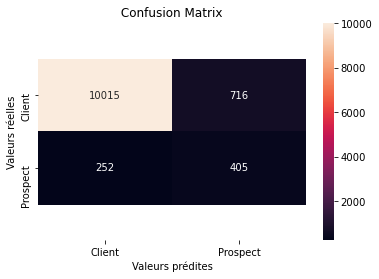

In [87]:
fig = plt.figure()
# Matrice de confusion
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred_XGB), annot=True, ax = ax ,fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Valeurs prédites');ax.set_ylabel('Valeurs réelles'); 
ax.set_title(' Confusion Matrix '); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.xaxis.set_ticklabels(['Client', 'Prospect']); ax.yaxis.set_ticklabels(['Client', 'Prospect'])

> ### <font color = 'purple'> Equilibrer le data set avec smote </font>

In [88]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [89]:
print("Après l'équilibrage, le compte des '1' : {}".format(sum(y_res==1)))
print("Après l'équilibrage, le compte des '0' : {}".format(sum(y_res==0)))

Après l'équilibrage, le compte des '1' : 25112
Après l'équilibrage, le compte des '0' : 25112


> ### <font color = 'purple'> Refaire le modèle en équilibrant le data set avec smote </font>

In [90]:
model_XGB.fit(X_res, y_res)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=0.5, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=164,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
pred_XGB_equi = model_XGB.predict(X_test)

In [92]:
report = classification_report(y_test, pred_XGB_equi)
# report1 = classification_report_imbalanced(y_test, pred_XGB_equi)
print(report)
# print("="*60)
# print(report1)

              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89     10731
         1.0       0.21      0.80      0.33       657

    accuracy                           0.81     11388
   macro avg       0.60      0.81      0.61     11388
weighted avg       0.94      0.81      0.86     11388



[Text(0, 0.5, 'Client'), Text(0, 1.5, 'Prospect')]

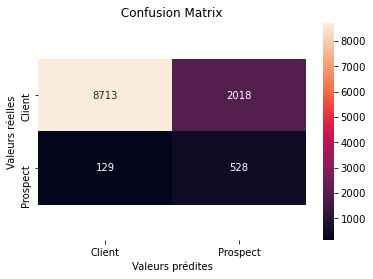

In [93]:
fig = plt.figure()
# Matrice de confusion
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred_XGB_equi), annot=True, ax = ax ,fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Valeurs prédites');ax.set_ylabel('Valeurs réelles'); 
ax.set_title(' Confusion Matrix '); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.xaxis.set_ticklabels(['Client', 'Prospect']); ax.yaxis.set_ticklabels(['Client', 'Prospect'])

<strong>Remarque</strong>: On remarque qu'en équilibrant le data set avec smote,le recall s'est amélioré et le nombre de faux positif a diminué. donc nous retenant ce modèle pour la prédiction

In [94]:
feature_imp = pd.Series(model_XGB.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp = pd.DataFrame(feature_imp,index=X_train.columns, columns = ['Importance'])
feature_imp

,Importance
AGE_ANC_PART,0.019847
departement.1,0.003915
Age,0.009613
SITU_FAM_AVAN,0.010890
CD_SEX,0.029602
...,...
job_SS ACT.-,0.020234
flux_max,0.006368
flux_min,0.005692
flux_mean,0.023020


In [95]:
top10 = feature_imp.sort_values(by = 'Importance',ascending=False).head(10)
top10

,Importance
NB_DAV,0.081904
NB_EPARGNE,0.071275
NB_CONTRAT_eprgn,0.046521
NB_CONTRAT_Ass,0.040903
NB_PEL_CARRE,0.040406
MT_1,0.035751
NB_CONTRAT_cred,0.034290
NB_CONTRAT_BAQ,0.033850
enfant_client,0.032147
CD_SEX,0.029602


In [109]:
train = X_res[['NB_DAV','NB_EPARGNE','NB_CONTRAT_Ass', 'MT_1', 'NB_CONTRAT_cred','enfant_client', 'CD_SEX' ]]
test = X_test[['NB_DAV','NB_EPARGNE','NB_CONTRAT_Ass', 'MT_1', 'NB_CONTRAT_cred','enfant_client' ,'CD_SEX' ]]

In [123]:
model_XGB.fit(train,y_res)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=0.5, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=164,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [124]:
pred_XGB_top10 = model_XGB.predict(test)

In [118]:
pd.DataFrame(pred_XGB_top10).to_csv('prediction.csv', encoding = 'utf-8')

In [119]:
y_test.to_csv('reel.csv')

In [112]:
report = classification_report(y_test, pred_XGB_top10)
# report1 = classification_report_imbalanced(y_test, pred_XGB_equi)
print(report)
# print("="*60)
# print(report1)

              precision    recall  f1-score   support

         0.0       0.99      0.60      0.74     10731
         1.0       0.12      0.85      0.20       657

    accuracy                           0.61     11388
   macro avg       0.55      0.73      0.47     11388
weighted avg       0.94      0.61      0.71     11388



[Text(0, 0.5, 'Client'), Text(0, 1.5, 'Prospect')]

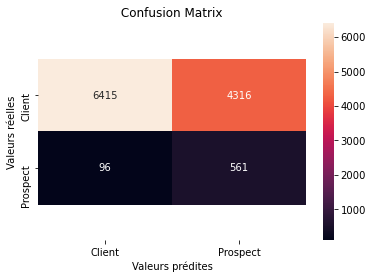

In [113]:
fig = plt.figure()
# Matrice de confusion
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred_XGB_top10), annot=True, ax = ax ,fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Valeurs prédites');ax.set_ylabel('Valeurs réelles'); 
ax.set_title(' Confusion Matrix '); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.xaxis.set_ticklabels(['Client', 'Prospect']); ax.yaxis.set_ticklabels(['Client', 'Prospect'])

In [126]:
proba = model_XGB.predict_proba(test)
pd.DataFrame(proba, columns = ['Classe 0','Classe 1']).to_csv('probabilite.csv')

<strong>Remarque : </strong><br> Le taux de faux negatifs s'est améliorer, on décide de garder ce modéle pour les prédictions

> ### <font color ='purple'> Enregistrement du modèle</font>

In [114]:
pickle.dump(model_XGB,open('model.pkl','wb'))